In [1]:
#importing the Libraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Reading the Dataset
dataset = pd.read_csv('finaldata.csv')

In [3]:
dataset

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,n_cores,ram,talk_time,pixel_area,screen_area,total_camera_mp,blue,dual_sim,touch_screen,wifi,supports_3_4G,price_range
0,842,2.2,7,0.6,188,2,2549,19,15120,63,3,0,0,0,1,0,1
1,1021,0.5,53,0.7,136,3,2631,7,1799140,51,6,1,1,1,0,1,2
2,563,0.5,41,0.9,145,5,2603,9,2167308,22,8,1,1,1,0,1,2
3,615,2.5,10,0.8,131,6,2769,11,2171776,128,9,1,0,0,0,1,2
4,1821,1.2,44,0.6,141,2,1411,15,1464096,16,27,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,2,0.8,106,6,668,19,2309580,52,14,1,1,1,0,1,0
1996,1965,2.6,39,0.2,187,4,2032,16,1797975,110,3,1,1,1,1,1,2
1997,1911,0.9,36,0.7,108,8,3057,5,1416576,9,4,0,1,1,0,1,3
1998,1512,0.9,46,0.1,145,5,869,19,225120,180,9,0,0,1,1,1,0


In [4]:
dataset.columns

Index(['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt',
       'n_cores', 'ram', 'talk_time', 'pixel_area', 'screen_area',
       'total_camera_mp', 'blue', 'dual_sim', 'touch_screen', 'wifi',
       'supports_3_4G', 'price_range'],
      dtype='object')

In [5]:
# Assuming the output column is the last column, split into X (inputs) and y (output)
X = dataset.iloc[:, 0:16]
y = dataset.iloc[:, 16]

In [6]:
X

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,n_cores,ram,talk_time,pixel_area,screen_area,total_camera_mp,blue,dual_sim,touch_screen,wifi,supports_3_4G
0,842,2.2,7,0.6,188,2,2549,19,15120,63,3,0,0,0,1,0
1,1021,0.5,53,0.7,136,3,2631,7,1799140,51,6,1,1,1,0,1
2,563,0.5,41,0.9,145,5,2603,9,2167308,22,8,1,1,1,0,1
3,615,2.5,10,0.8,131,6,2769,11,2171776,128,9,1,0,0,0,1
4,1821,1.2,44,0.6,141,2,1411,15,1464096,16,27,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,2,0.8,106,6,668,19,2309580,52,14,1,1,1,0,1
1996,1965,2.6,39,0.2,187,4,2032,16,1797975,110,3,1,1,1,1,1
1997,1911,0.9,36,0.7,108,8,3057,5,1416576,9,4,0,1,1,0,1
1998,1512,0.9,46,0.1,145,5,869,19,225120,180,9,0,0,1,1,1


In [7]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [8]:
# Train/Test Split
# -------------------------------
#split into training set and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Save feature names
feature_names = X.columns

In [11]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# -------------------------------
# Feature Selection / Dimensionality Reduction
# -------------------------------

# SelectKBest (ANOVA F-test)
kbest = SelectKBest(score_func=f_classif, k=10)
X_train_kbest = kbest.fit_transform(X_train_scaled, y_train)
X_test_kbest = kbest.transform(X_test_scaled)
selected_features_kbest = feature_names[kbest.get_support()]
print("SelectKBest top features:", selected_features_kbest)

# Recursive Feature Elimination (RFE) with Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(logreg, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)
selected_features_rfe = feature_names[rfe.support_]
print("RFE selected features:", selected_features_rfe)

# PCA (unsupervised)
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print("PCA explained variance ratio:", pca.explained_variance_ratio_)

# LDA (supervised)
lda = LDA(n_components=3)  # 4 classes → 3 components
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)



SelectKBest top features: Index(['battery_power', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'ram',
       'talk_time', 'pixel_area', 'screen_area', 'touch_screen'],
      dtype='object')
RFE selected features: Index(['battery_power', 'int_memory', 'mobile_wt', 'n_cores', 'ram',
       'pixel_area', 'screen_area', 'blue', 'touch_screen', 'wifi'],
      dtype='object')
PCA explained variance ratio: [0.07404564 0.07122102 0.0682811  0.06767526 0.06678378 0.06414751
 0.06392115 0.06282463 0.06133139 0.06039785]


In [12]:
final_features = [
    'battery_power', 'int_memory', 'mobile_wt', 'n_cores', 'ram',
    'pixel_area', 'screen_area', 'touch_screen', 'blue', 'wifi'
]


In [13]:
# -------------------------------
# Subset final features
# -------------------------------
X_final = dataset[final_features]   # Only selected features
y = dataset['price_range']          # Target


In [14]:
# -------------------------------
# Train/Test Split
# -------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

In [15]:
# -------------------------------
# Scale numeric features
# -------------------------------
from sklearn.preprocessing import StandardScaler

numeric_features = ['battery_power', 'int_memory', 'mobile_wt', 'n_cores', 'ram',
                    'pixel_area', 'screen_area']

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30]
}

grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_macro',   # use f1_macro for multi-class
    refit=True,
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train, y_train)  # Train GridSearch on your final features

best_rf = grid.best_estimator_  # Best model after hyperparameter search
y_pred = best_rf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Best Hyperparameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'n_estimators': 50}
Accuracy: 0.9125

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       100
           1       0.90      0.87      0.88       100
           2       0.85      0.89      0.87       100
           3       0.95      0.93      0.94       100

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400


Confusion Matrix:
 [[96  4  0  0]
 [ 4 87  9  0]
 [ 0  6 89  5]
 [ 0  0  7 93]]


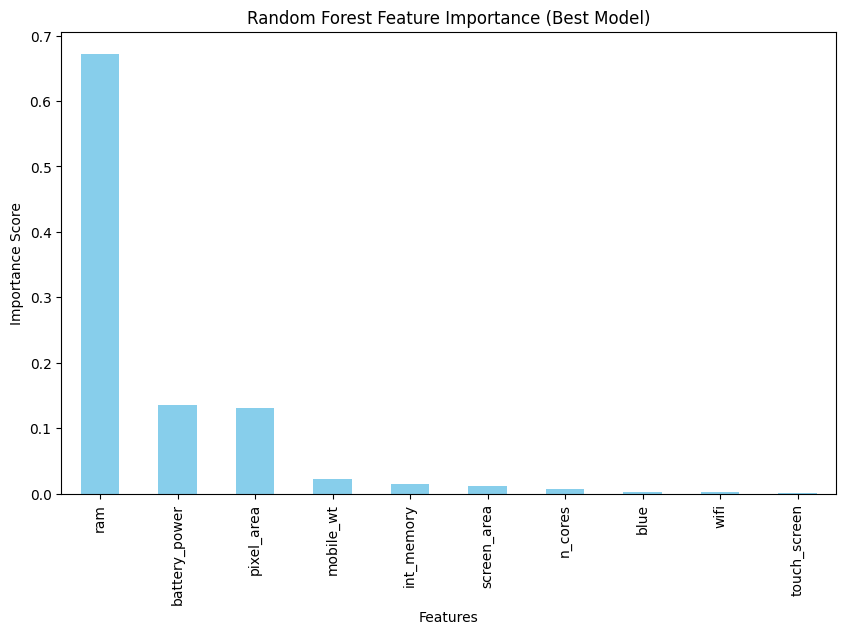

In [17]:
# -------------------------------
# Feature Importance Visualization
# -------------------------------
import matplotlib.pyplot as plt
import pandas as pd

# Use best_rf from GridSearchCV
importance = pd.Series(best_rf.feature_importances_, index=final_features)
importance = importance.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
importance.plot(kind='bar', color='skyblue')
plt.title("Random Forest Feature Importance (Best Model)")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()


In [18]:
# Choose top features (for example, importance > 0.05)
#top_features = importance[importance > 0.05].index.tolist()
#print("Top features to keep:", top_features)

In [19]:
top_features = [
    'ram',
    'battery_power',
    'pixel_area',
    'int_memory',
    'n_cores'
]

In [20]:
# Split data again with only top features
X_top = dataset[top_features].values

from sklearn.model_selection import train_test_split
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=42, stratify=y)


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30]
}

# GridSearchCV
grid_top = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_macro',
    refit=True,
    verbose=2,
    n_jobs=-1
)

# Fit
grid_top.fit(X_train_top, y_train_top)

# Predict
y_pred_top = grid_top.predict(X_test_top)

# Evaluate
print("Best Hyperparameters:", grid_top.best_params_)
print("Accuracy:", accuracy_score(y_test_top, y_pred_top))
print("\nClassification Report:\n", classification_report(y_test_top, y_pred_top))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_top, y_pred_top))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'n_estimators': 200}
Accuracy: 0.9275

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       100
           1       0.91      0.90      0.90       100
           2       0.88      0.90      0.89       100
           3       0.95      0.95      0.95       100

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400


Confusion Matrix:
 [[96  4  0  0]
 [ 3 90  7  0]
 [ 0  5 90  5]
 [ 0  0  5 95]]


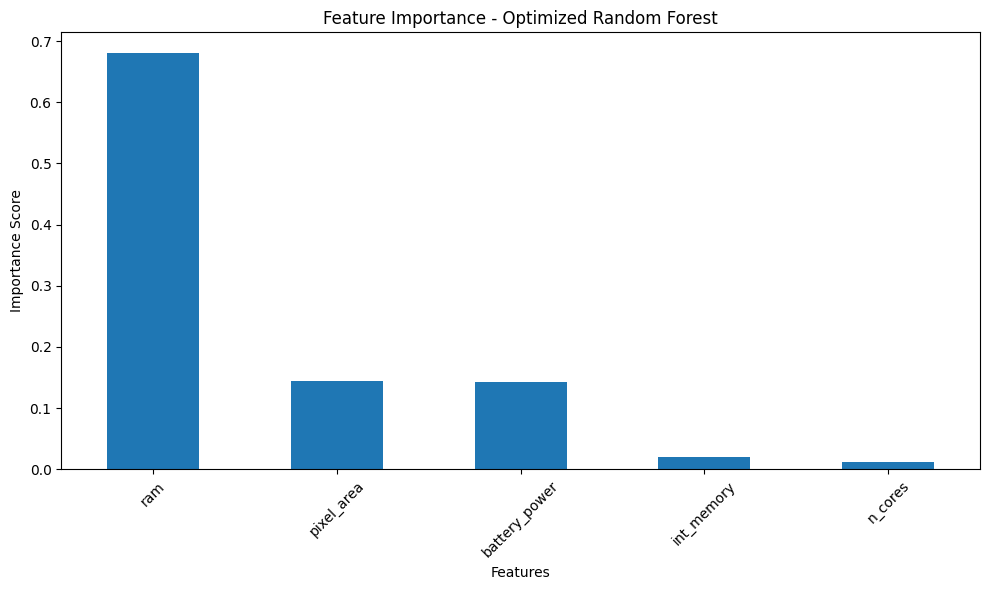

ram              0.680252
pixel_area       0.144154
battery_power    0.142716
int_memory       0.020559
n_cores          0.012320
dtype: float64


In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Use grid_top.best_estimator_ directly
importance = pd.Series(
    grid_top.best_estimator_.feature_importances_,
    index=top_features
).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
importance.plot(kind='bar')
plt.title("Feature Importance - Optimized Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(importance)


In [28]:
import pickle

# Save only the best model (from GridSearchCV)
filename = "Mobile_Price_RF_Model.sav"
pickle.dump(grid_top.best_estimator_, open(filename, 'wb'))

# Load the model for inference
model = pickle.load(open("Mobile_Price_RF_Model.sav", 'rb'))

# Example: predict on new input
import numpy as np
new_input = np.array([[4000, 64, 150, 8, 2]])  # [ram, battery_power, pixel_area, int_memory, n_cores]
prediction = model.predict(new_input)
print("Predicted price range:", prediction)


Predicted price range: [2]
